In [5]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

# Membaca Gambar

In [6]:
img = cv2.imread("gedungsate.jpg") #menggunakan library OpenCV (cv2) untuk membaca gambar dengan filename gedungsate.jpg

In [7]:
img_height = img.shape[0] #mengambil nilai pertama dari tuple img.shape, yang merupakan tinggi gambar.
img_width = img.shape[1] #mengambil nilai kedua dari tuple img.shape, yang merupakan lebar gambar.
img_channel = img.shape[2] #mengambil nilai ketiga dari tuple img.shape, yang merupakan channel gambar.

# Merubah gambar menjadi Grayscale

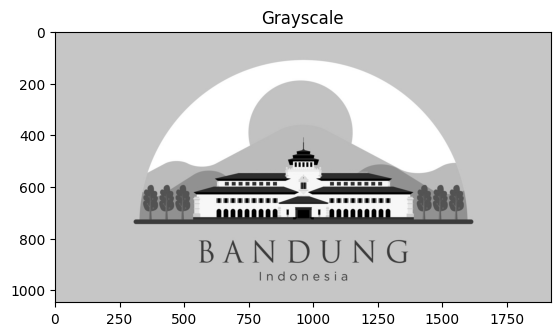

In [8]:
img_grayscale = np.zeros(img.shape, dtype=np.uint8)
#membuat matriks kosong dengan ukuran yang sama dengan gambar asli. Tipe data np.uint8

#dilakukan nested loop (loop bersarang) untuk mengiterasi setiap piksel pada gambar
for y in range(0, img_height): #mengiterasi melalui indeks piksel pada sumbu y (tinggi) gambar.
    for x in range(0, img_width): #mengiterasi melalui indeks piksel pada sumbu x (lebar) gambar.
        #nilai intensitas merah (red), hijau (green), dan biru (blue) diambil dari piksel asli di posisi (y, x)
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        gray = (int(red) + int(green) + int(blue)) / 3 #rata rata dari ketiga komponen warna untuk mendapatkan skala abu-abu
        img_grayscale[y][x] = (gray, gray, gray)
        
plt.imshow(img_grayscale) #hasil rata rata disimpan dalam matriks img_graysclae
plt.title("Grayscale") #memberi nama pada judul
plt.show() #menampilkan gambar stelah di konversi ke abu abu

# Menampilkan Histogram Gambar Grayscale
# Membuat variabel untuk menyimpan data gambar

In [9]:
hg = np.zeros((256)) #membuat array hg yang terdiri dari 256 elemen dengan nilai awal 0.

# Mengisi setiap nilai dalam array hg dengan 0

In [10]:
for x in range(0, 256): # melakukan perulangan untuk menginisialisasi setiap elemen dalam array hg dengan nilai 0.
    hg[x] = 0

# Menghitung nilai dari gambar

In [11]:
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hg[gray] += 1

# Menampilkan Histogram

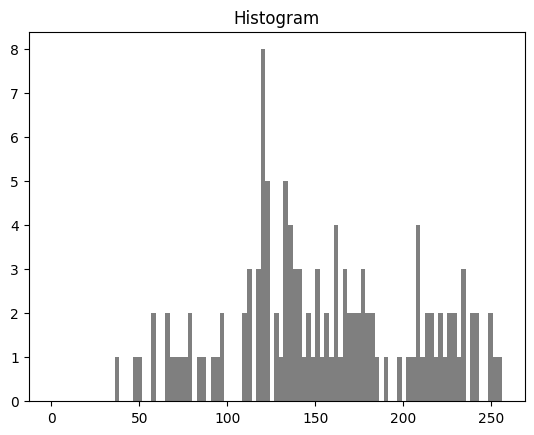

In [12]:
# plt.figure(figsize=(20, 6))
# plt.plot(hg, color="black", linewidth=2.0)
# plt.show()

bins = np.linspace(0, 256, 100) #membuat interval pada histogram, untuk membuat 100 interval yang merata dari 0 sampai 255
plt.hist(hg, bins, color="black", alpha=0.5) #menghitung dan menampilkan histogram, dari data yang disimpan pada array 'hg'
plt.title("Histogram")
plt.show()

# Menampilkan Histogram Gambar RGB
# Membuat variabel untuk menyimpan data gambar

In [13]:
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros((768))

# Mengisi setiap nilai dalam array hg dengan 0

In [14]:
#melakukan perulangan untuk menginisialisasi setiap elemen dalam array histogram dengan nilai 0.

for x in range(0, 256): #mengintegrasi dari angka 0 sampai 255
    hgr[x] = 0
    hgg[x] = 0
    hgb[x] = 0
    
for x in range(0, 768): #mengintegrasi dari angka 0 sampai 767
    hgrgb[x] = 0

# Menghitung nilai dari gambar

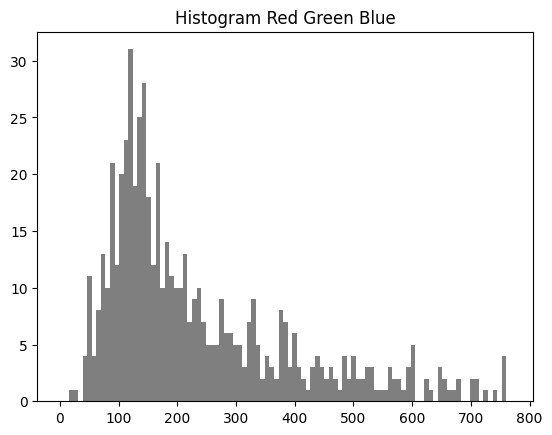

In [15]:
for x in range(0, 256):
    hgr[x] = 0
    hgg[x] = 0
    hgb[x] = 0
    
for x in range(0, 768):
    hgrgb[x] = 0

# th = int(256/64)
temp = [0]
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        red = int(img[y][x][0])
        green = int(img[y][x][1])
        blue = int(img[y][x][2])
        green = green + 256
        blue = blue + 512
#         temp.append(green)
        hgrgb[red] += 1
        hgrgb[green] += 1
        hgrgb[blue] += 1

binsrgb = np.linspace(0, 768, 100)
plt.hist(hgrgb, binsrgb, color="black", alpha=0.5)
# plt.plot(hgrgb)
plt.title("Histogram Red Green Blue")
plt.show()

# Menampilkan Histogram

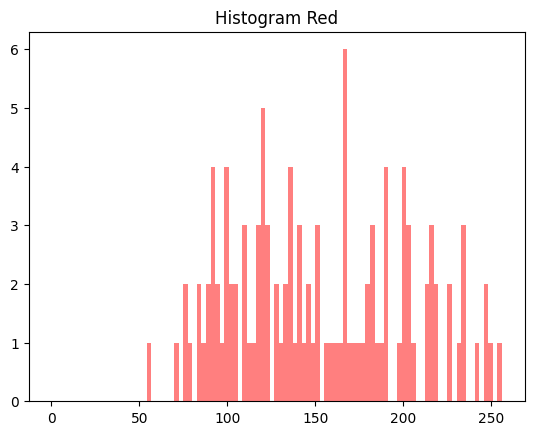

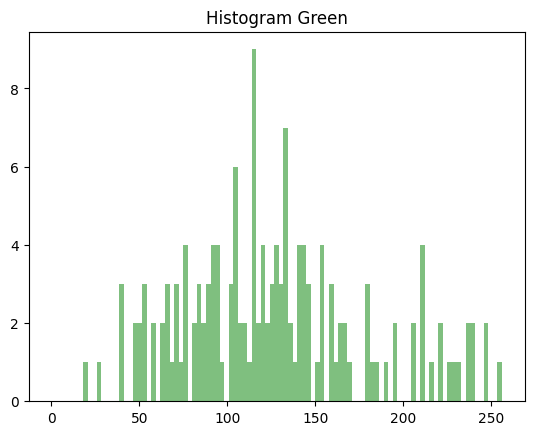

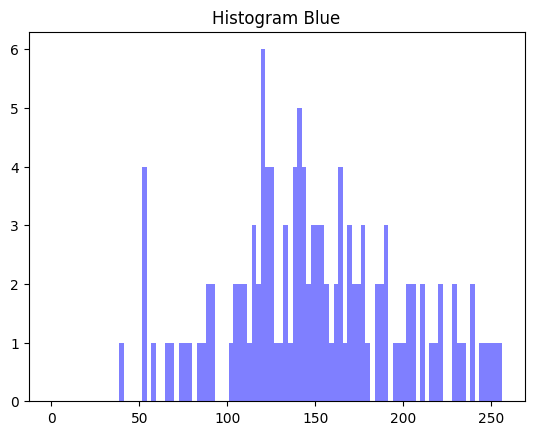

In [16]:
for y in range(0, img_height):
    for x in range(0, img_width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1

bins = np.linspace(0, 256, 100)
plt.hist(hgr, bins, color="red", alpha=0.5)
plt.title("Histogram Red")
plt.show()

plt.hist(hgg, bins, color="green", alpha=0.5)
plt.title("Histogram Green")
plt.show()

plt.hist(hgb, bins, color="blue", alpha=0.5)
plt.title("Histogram Blue")
plt.show()

# Menampilkan Histogram Kumulatif

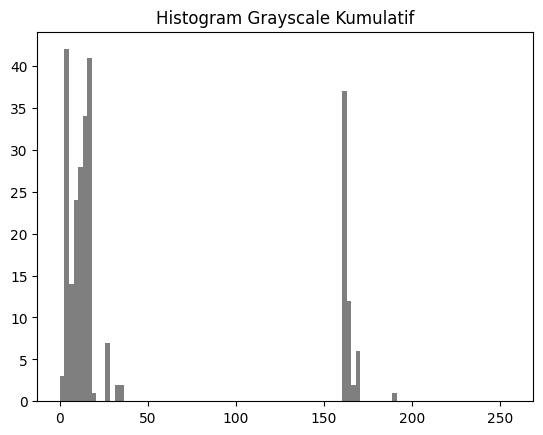

In [17]:
#array yang digunakan untuk menghitung histogram dan histogram kumulatif. Keduanya memiliki ukuran 256 elemen.
hgk = np.zeros((256))
c = np.zeros((256))

for x in range(0, 256):
    hgk[x] = 0
    c[x] = 0

for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgk[gray] += 1 #Jumlah piksel dengan intensitas tersebut pada gambar grayscale ditambahkan dengan 1.
                
c[0] = hgk[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgk[x] #histogram kumulatif c dihitung dengan mengakumulasikan jumlah piksel pada setiap intensitas dari histogram hgk

hmaxk = c[255] #nilai maksimum dalam histogram kumulatif

for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Kumulatif")
plt.show()

# Menampilkan Histogram Hequalisasi

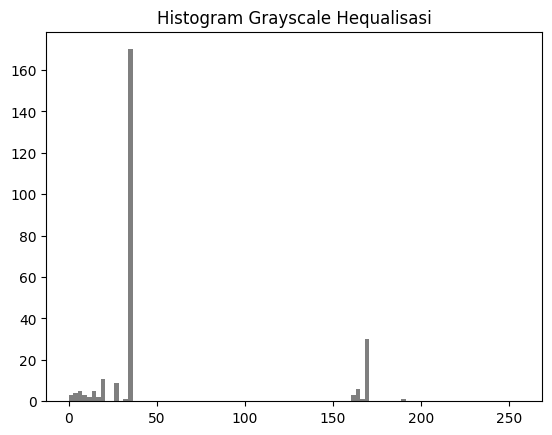

In [18]:
hgh = np.zeros((256))
h = np.zeros((256))
c = np.zeros((256))

for x in range(0, 256):
    hgh[x] = 0
    h[x] = 0
    c[x] = 0

for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgh[gray] += 1
                
h[0] = hgh[0]
for x in range(1, 256):
     h[x] = h[x-1] + hgh[x]

for x in range(0, 256):
     h[x] = h[x] / img_height / img_width

for x in range(0, 256):
    hgh[x] = 0
    
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        gray = h[gray] * 255
        hgh[int(gray)] += 1

c[0] = hgh[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgh[x]

hmaxk = c[255]

for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

plt.hist(c, bins, color="black", alpha=0.5) #mengatur warna histogram menjadi hitam, dan `alpha=0.5
plt.title("Histogram Grayscale Hequalisasi")
plt.show()